## US Industry Emissions Analysis

In [592]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

In [593]:
year = 2016
df = pd.read_excel('OriginalData.xlsx', sheet_name=str(year)+'_Detail_Industry')
df = df[['Industry Name', 'Substance', 'Supply Chain Emission Factors with Margins']]
df = df.rename(columns={'Supply Chain Emission Factors with Margins':'Emission Factors 2016'})
df.head()

,Industry Name,Substance,Emission Factors 2016
0,Cement manufacturing,carbon dioxide,6.440
1,"Electric power generation, transmission, and d...",carbon dioxide,4.302
2,Lime and gypsum product manufacturing,carbon dioxide,2.931
3,Synthetic dye and pigment manufacturing,carbon dioxide,1.593
4,Plastics material and resin manufacturing,carbon dioxide,1.563


In [594]:
while(year>=2011):
    year-=1
    temp_df = pd.read_excel('OriginalData.xlsx', sheet_name=str(year)+'_Detail_Industry')[['Industry Name', 'Substance', 
                                                                                             'Supply Chain Emission Factors with Margins']]
    temp_df = temp_df.rename(columns={'Supply Chain Emission Factors with Margins':'Emission Factors '+str(year)})
    df = df.merge(temp_df, how='inner', left_on=['Industry Name', 'Substance'], 
                  right_on=['Industry Name', 'Substance'])
df=df.sort_values(by='Industry Name').reset_index(drop=True)
df.head()

    

,Industry Name,Substance,Emission Factors 2016,Emission Factors 2015,Emission Factors 2014,Emission Factors 2013,Emission Factors 2012,Emission Factors 2011,Emission Factors 2010
0,Abrasive product manufacturing,nitrous oxide,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,Abrasive product manufacturing,carbon dioxide,0.258,0.261,0.261,0.262,0.259,0.272,0.282
2,Abrasive product manufacturing,other GHGs,0.002,0.003,0.003,0.002,0.003,0.003,0.003
3,Abrasive product manufacturing,methane,0.001,0.001,0.001,0.001,0.001,0.001,0.001
4,Accommodation,nitrous oxide,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [595]:
gwp = {'carbon dioxide':1, 'methane':28, 'nitrous oxide':265, 'other GHGs':1}
df_gwp = df.copy()
df_gwp['GWP'] = df['Substance'].map(gwp)
df_gwp.head()

,Industry Name,Substance,Emission Factors 2016,Emission Factors 2015,Emission Factors 2014,Emission Factors 2013,Emission Factors 2012,Emission Factors 2011,Emission Factors 2010,GWP
0,Abrasive product manufacturing,nitrous oxide,0.000,0.000,0.000,0.000,0.000,0.000,0.000,265
1,Abrasive product manufacturing,carbon dioxide,0.258,0.261,0.261,0.262,0.259,0.272,0.282,1
2,Abrasive product manufacturing,other GHGs,0.002,0.003,0.003,0.002,0.003,0.003,0.003,1
3,Abrasive product manufacturing,methane,0.001,0.001,0.001,0.001,0.001,0.001,0.001,28
4,Accommodation,nitrous oxide,0.000,0.000,0.000,0.000,0.000,0.000,0.000,265


In [596]:
year=2016
while(year>=2010):
    df_gwp['Emission Factors '+str(year)] = df_gwp['Emission Factors '+str(year)]*df_gwp['GWP']
    df_gwp = df_gwp.rename(columns={'Emission Factors '+str(year):'CO2e/USD '+str(year)})
    year-=1
df_gwp = df_gwp.drop(columns=['GWP'], axis=1)

df_gwp.head()

,Industry Name,Substance,CO2e/USD 2016,CO2e/USD 2015,CO2e/USD 2014,CO2e/USD 2013,CO2e/USD 2012,CO2e/USD 2011,CO2e/USD 2010
0,Abrasive product manufacturing,nitrous oxide,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,Abrasive product manufacturing,carbon dioxide,0.258,0.261,0.261,0.262,0.259,0.272,0.282
2,Abrasive product manufacturing,other GHGs,0.002,0.003,0.003,0.002,0.003,0.003,0.003
3,Abrasive product manufacturing,methane,0.028,0.028,0.028,0.028,0.028,0.028,0.028
4,Accommodation,nitrous oxide,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [597]:
df_gwp = df_gwp.groupby(['Industry Name']).sum().reset_index()
df_gwp

,Industry Name,CO2e/USD 2016,CO2e/USD 2015,CO2e/USD 2014,CO2e/USD 2013,CO2e/USD 2012,CO2e/USD 2011,CO2e/USD 2010
0,Abrasive product manufacturing,0.288,0.292,0.292,0.292,0.290,0.303,0.313
1,Accommodation,0.228,0.234,0.250,0.252,0.250,0.272,0.279
2,"Accounting, tax preparation, bookkeeping, and ...",0.057,0.059,0.062,0.063,0.062,0.068,0.070
3,Adhesive manufacturing,0.690,0.710,0.723,0.657,0.646,0.687,0.721
4,"Advertising, public relations, and related ser...",0.099,0.102,0.107,0.107,0.106,0.115,0.116
...,...,...,...,...,...,...,...,...
390,Wineries,0.263,0.268,0.273,0.275,0.276,0.290,0.298
391,Wired telecommunications carriers,0.087,0.089,0.095,0.093,0.093,0.101,0.104
392,Wireless telecommunications carriers (except s...,0.121,0.124,0.131,0.131,0.130,0.140,0.172
393,Wiring device manufacturing,0.361,0.373,0.386,0.378,0.380,0.406,0.413


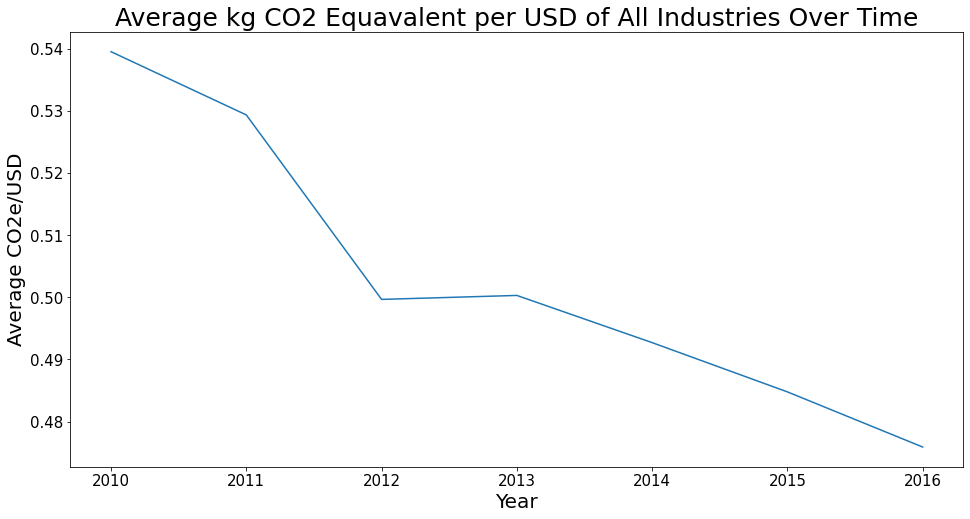

In [598]:
avgs = df_gwp.iloc[:, 1:].mean()[::-1]

fig = plt.figure(figsize=[16, 8])
ax = fig.add_subplot()

ax.set_title('Average kg CO2 Equavalent per USD of All Industries Over Time', fontsize=25)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Average CO2e/USD', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

years = [x for x in range(2010, 2017)]
ax.plot(years, avgs);

[0.0, -1.887589206536857, -7.394113424264205, -7.275405974785268, -8.68441178816599, -10.15441352420367, -11.800834236542174]


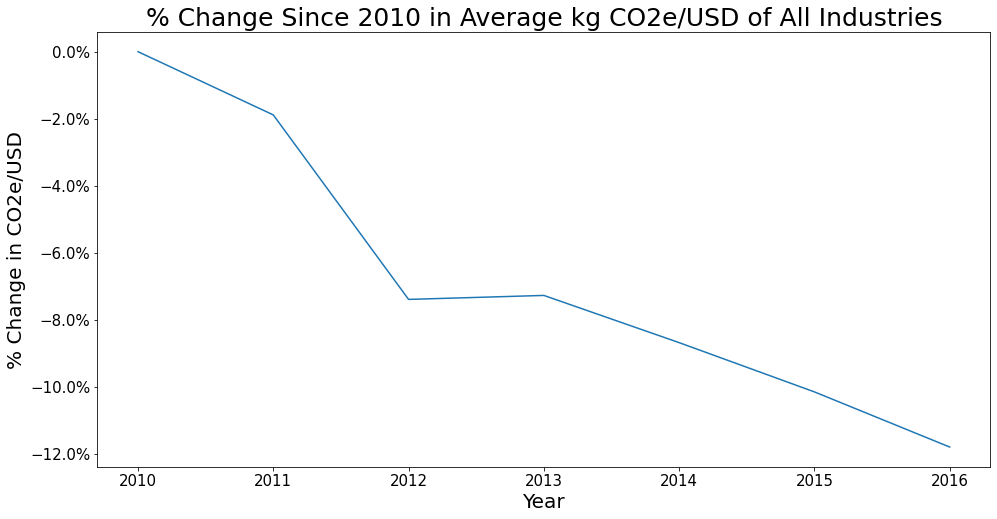

In [599]:
pct_change = []
for i in avgs:
    pct_change.append(((i - avgs[0])/avgs[0])*100)

fig = plt.figure(figsize=[16, 8])
ax = fig.add_subplot()

ax.set_title('% Change Since 2010 in Average kg CO2e/USD of All Industries', fontsize=25)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('% Change in avg kg CO2e/USD', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.plot(years, pct_change);

Over time the average CO2e/USD of all industries is going down. This is not due to inflation since in the data set the dollars are set to 2018 dollars meaning inflation is accounted for. This means that industries are starting to emit less greenhouse gasses per dollar spent in the industry.

What Industries have the highest kg CO2e/USD?

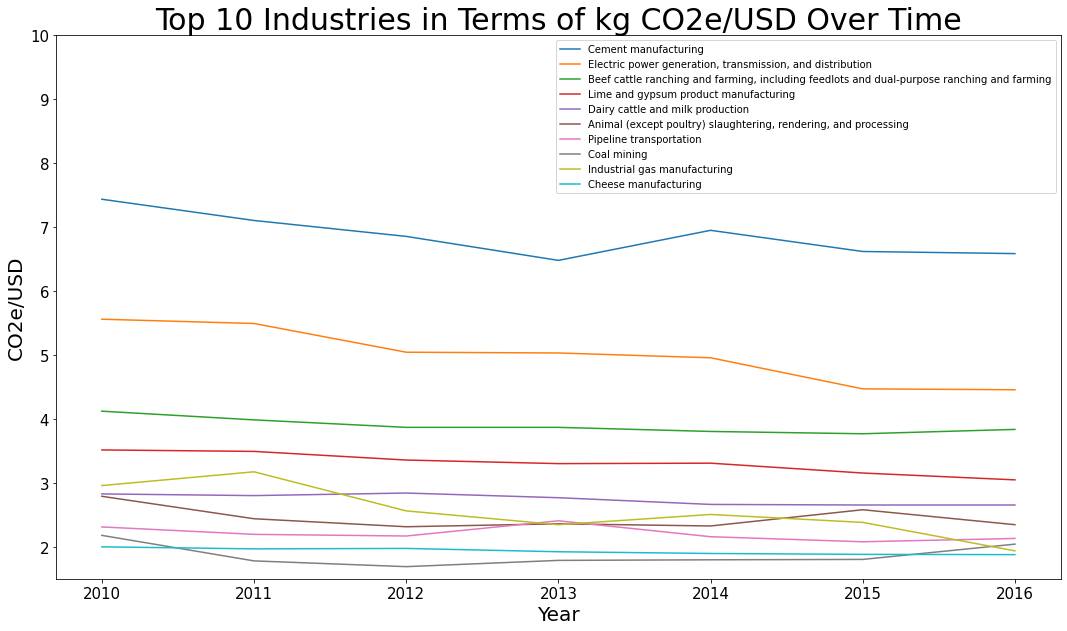

In [603]:
df_gwp = df_gwp.sort_values(by='CO2e/USD 2016', ascending=0)
top_10 = df_gwp.head(10)


fig = plt.figure(figsize=[18, 10])
ax = fig.add_subplot()

ax.set_title('Top 10 Industries in Terms of kg CO2e/USD Over Time', fontsize=30)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('CO2e/USD', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylim(bottom=1.5, top=10)
for i in range(10):
    ax.plot(years, top_10.iloc[i, 1:-1][::-1], label=top_10.iloc[i, 0])

ax.legend(loc=1, fontsize=10);

In [607]:
df_gwp['Percent Change'] = ((df_gwp['CO2e/USD 2016'] - df_gwp['CO2e/USD 2010'])/
                             df_gwp['CO2e/USD 2010']) * 100
df_gwp = df_gwp.fillna(0)
df_gwp = df_gwp.sort_values(by='Percent Change', ascending=True)
inc = np.where(df_gwp['Percent Change'] > 0, 1, 0).mean() * 100
dec = np.where(df_gwp['Percent Change'] < 0, 1, 0).mean() * 100
print(f'% of Industries Increasing in kg CO2e/USD: {round(inc, 2)}%')
print(f'% of Industries Decreasing in kg CO2e/USD: {round(dec, 2)}%')
change = df_gwp['Percent Change'].mean()
print(f'Average Annual Percent Change from 2010 to 2016: {round(change/len(years), 2)}%')


% of Industries Increasing in kg CO2e/USD: 5.32%
% of Industries Decreasing in kg CO2e/USD: 93.92%
Average Annual Percent Change from 2010 to 2016: -1.9%


The vast of majority of industries are decreasing their greenhouse gas emissions per dollar spent over time which is a good sign. The percent change on average is 1.9% a year. 

Let's see the industries with the biggest changes

#1: Soybean and other oilseed processing 
#2: Multifamily residential structures 
#3: Monetary authorities and depository credit intermediation 
#4: Industrial gas manufacturing 
#5: Other Basic Inorganic Chemical Manufacturing 
#6: Other computer related services, including facilities management 
#7: Other personal services 
#8: Management of companies and enterprises 
#9: Travel arrangement and reservation services 
#10: Office administrative services 


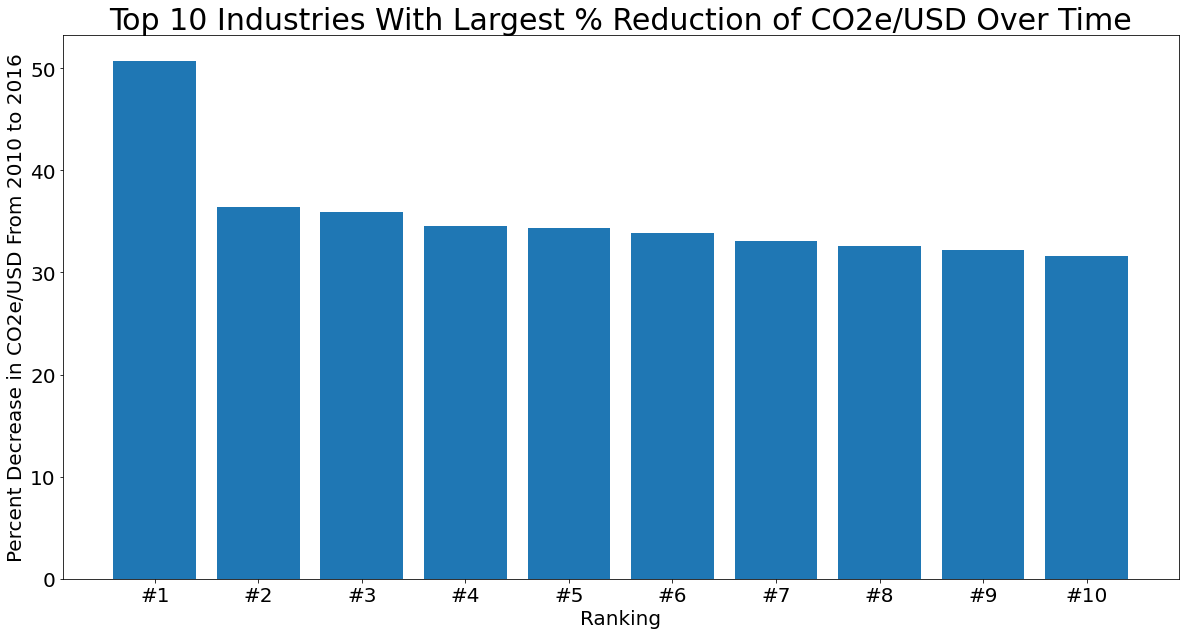

In [605]:
top_10 = df_gwp.head(10)


fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot()

ax.set_title('Top 10 Industries With Largest % Reduction of CO2e/USD Over Time', fontsize=30)
ax.set_xlabel('Ranking', fontsize=20)
ax.set_ylabel('Percent Decrease in CO2e/USD From 2010 to 2016', fontsize=20)
ax.bar([f'#{x}' for x in range(1, 11)], top_10['Percent Change']*-1)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

for n, i in enumerate(top_10['Industry Name']):
    print(f'#{n+1}: {i} ')

#1: Plastics material and resin manufacturing 
#2: Air conditioning, refrigeration, and warm air heating equipment manufacturing 
#3: Medicinal and botanical manufacturing 
#4: Synthetic dye and pigment manufacturing 
#5: Plastics pipe, pipe fitting, and unlaminated profile shape manufacturing 
#6: Plastics packaging materials and unlaminated film and sheet manufacturing 
#7: Iron, gold, silver, and other metal ore mining 
#8: Soap and cleaning compound manufacturing 
#9: Fertilizer manufacturing 
#10: Other basic organic chemical manufacturing 


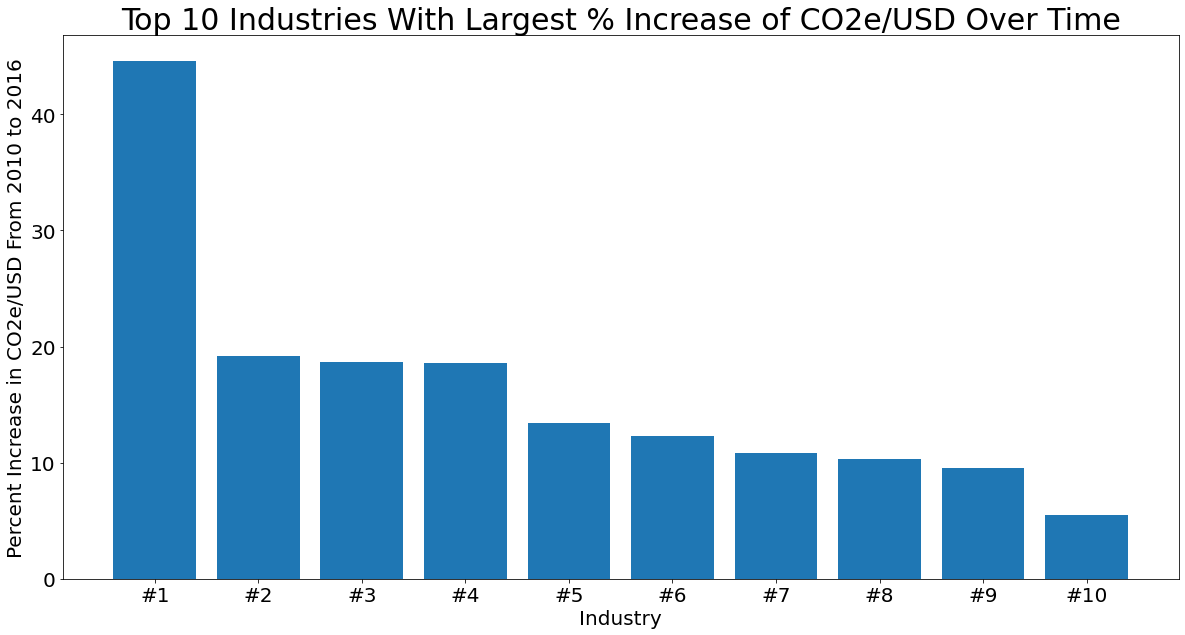

In [606]:
top_10 = df_gwp.tail(10)
fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot()

ax.set_title('Top 10 Industries With Largest % Increase of CO2e/USD Over Time', fontsize=30)
ax.set_xlabel('Industry', fontsize=20)
ax.set_ylabel('Percent Increase in CO2e/USD From 2010 to 2016', fontsize=20)
ax.bar([f'#{x}' for x in range(1, 11)], top_10['Percent Change'][::-1])
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

for n, i in enumerate(top_10['Industry Name'][::-1]):
    print(f'#{n+1}: {i} ')

It appears that a lot of the industries that increased their greenhouse gas emissions per dollar are manufacturing industries, and plastic manufacturing has had a massive increase in its emissions.